In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader

# Define teacher model architecture
class TeacherModel(nn.Module):
    def __init__(self):
        super(TeacherModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define student model architecture
class StudentModel(nn.Module):
    def __init__(self):
        super(StudentModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Define data loaders for teacher models
num_teachers = 10
teacher_loaders = []
for i in range(num_teachers):
    teacher_data = Subset(train_dataset, range(i * len(train_dataset) // num_teachers, (i + 1) * len(train_dataset) // num_teachers))
    teacher_loaders.append(DataLoader(teacher_data, batch_size=64, shuffle=True))

# Train teacher models
teacher_models = []
for loader in teacher_loaders:
    model = TeacherModel()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(5):  # Train for 5 epochs
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    teacher_models.append(model)

# Aggregate teacher predictions
def aggregate_predictions(models, data_loader):
    all_preds = []
    for model in models:
        preds = []
        with torch.no_grad():
            for inputs, _ in data_loader:
                outputs = model(inputs)
                preds.extend(torch.argmax(outputs, dim=1))
        all_preds.append(preds)
    return np.array(all_preds)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
teacher_preds = aggregate_predictions(teacher_models, train_loader)

# Train student model using aggregated teacher predictions
student_model = StudentModel()
optimizer = optim.Adam(student_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):  # Train for 5 epochs
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = student_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate student model
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = student_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the student network on the 10000 test images: %d %%' % (100 * correct / total))


100%|██████████| 9912422/9912422 [00:00<00:00, 89269987.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 98165067.93it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49559940.07it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4073236.85it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Accuracy of the student network on the 10000 test images: 96 %


In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader

# Define teacher model architecture
class TeacherModel(nn.Module):
    def __init__(self):
        super(TeacherModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define student model architecture
class StudentModel(nn.Module):
    def __init__(self):
        super(StudentModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Define data loaders for teacher models
num_teachers = 10
teacher_loaders = []
for i in range(num_teachers):
    teacher_data = Subset(train_dataset, range(i * len(train_dataset) // num_teachers, (i + 1) * len(train_dataset) // num_teachers))
    teacher_loaders.append(DataLoader(teacher_data, batch_size=64, shuffle=True))

# Train teacher models
teacher_models = []
for loader in teacher_loaders:
    model = TeacherModel()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(5):  # Train for 5 epochs
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    teacher_models.append(model)

# Aggregate teacher predictions
def aggregate_predictions(models, data_loader):
    all_preds = []
    for model in models:
        preds = []
        with torch.no_grad():
            for inputs, _ in data_loader:
                outputs = model(inputs)
                preds.extend(torch.argmax(outputs, dim=1))
        all_preds.append(preds)
    return np.array(all_preds)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
teacher_preds = aggregate_predictions(teacher_models, train_loader)

# Perform PATE analysis
def laplacian_mechanism(data_dep_eps, delta, sensitivity):
    scale = sensitivity / data_dep_eps
    beta = np.random.laplace(0, scale, 1)[0]
    return beta

epsilon = 0.1
delta = 1e-5
data_dep_eps = epsilon / num_teachers
sensitivity = 1  # Sensitivity of the PATE function

laplace_values = [laplacian_mechanism(data_dep_eps, delta, sensitivity) for _ in range(len(teacher_preds[0]))]
noisy_teacher_preds = teacher_preds + laplace_values

# Perform PATE analysis
def estimate_labels(preds, epsilon, delta):
    labels = np.zeros_like(preds[0])
    for idx, pred in enumerate(preds):
        labels += (pred == np.argmax(preds, axis=0)) * 1
    estimated_labels = np.mean(labels)
    return estimated_labels, epsilon, delta

estimated_labels, epsilon, delta = estimate_labels(noisy_teacher_preds, epsilon, delta)

# Calculate accuracy on test set
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = teacher_models[0](images)  # Use the first teacher model for inference
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total

print("Estimated Labels:", estimated_labels)
print("Data Independent Epsilon:", epsilon)
print("Delta:", delta)
print("Accuracy of the first teacher model on the test images: {:.2f}%".format(accuracy * 100))


Estimated Labels: 0.0
Data Independent Epsilon: 0.1
Delta: 1e-05
Accuracy of the first teacher model on the test images: 90.56%


In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader

# Define teacher model architecture
class TeacherModel(nn.Module):
    def __init__(self):
        super(TeacherModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define student model architecture
class StudentModel(nn.Module):
    def __init__(self):
        super(StudentModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Define data loaders for teacher models
num_teachers = 10
teacher_loaders = []
for i in range(num_teachers):
    teacher_data = Subset(train_dataset, range(i * len(train_dataset) // num_teachers, (i + 1) * len(train_dataset) // num_teachers))
    teacher_loaders.append(DataLoader(teacher_data, batch_size=64, shuffle=True))

# Train teacher models
teacher_models = []
for loader in teacher_loaders:
    model = TeacherModel()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(5):  # Train for 5 epochs
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    teacher_models.append(model)

# Aggregate teacher predictions
def aggregate_predictions(models, data_loader):
    all_preds = []
    for model in models:
        preds = []
        with torch.no_grad():
            for inputs, _ in data_loader:
                outputs = model(inputs)
                preds.extend(torch.argmax(outputs, dim=1))
        all_preds.append(preds)
    return np.array(all_preds)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
teacher_preds = aggregate_predictions(teacher_models, train_loader)

# Train student model using aggregated predictions
student_model = StudentModel()
optimizer = optim.Adam(student_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(5):  # Train for 5 epochs
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = student_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Perform PATE analysis using Moment Account mechanism
def laplace_mechanism(data_dep_eps, delta, c, T):
    eps_per_step = data_dep_eps / (2 * T * c ** 2 + 2 * c)
    scale = 1.0 / eps_per_step
    beta = np.random.laplace(0, scale, 1)[0]
    return beta

def pate_analysis(preds, epsilon, delta, T):
    c = 10  # Number of classes
    data_dep_eps = epsilon / (2 * T * np.log(1 / delta) ** 0.5)
    noise = [laplace_mechanism(data_dep_eps, delta, c, T) for _ in range(len(preds[0]))]
    noisy_counts = preds + noise
    max_counts = np.max(noisy_counts, axis=0)
    estimated_labels = np.argmax(noisy_counts, axis=0)
    return estimated_labels, data_dep_eps

estimated_labels, data_dep_eps = pate_analysis(teacher_preds, epsilon=2.04, delta=1e-5, T=5)

# Evaluate student model
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = student_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

student_accuracy = correct / total

print("Estimated Labels:", estimated_labels)
print("Data Dependent Epsilon:", data_dep_eps)
print("Accuracy of the student model on the test images: {:.2f}%".format(student_accuracy * 100))


Estimated Labels: [1 0 5 ... 0 4 5]
Data Dependent Epsilon: 0.06012254013077912
Accuracy of the student model on the test images: 96.99%


In [8]:
teacher_preds = aggregate_predictions(teacher_models, train_loader)

In [9]:
# Implement differential privacy via the Gaussian mechanism for example
def gaussian_mechanism(epsilon, delta, sensitivity, size):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * (sensitivity / epsilon)
    noise = np.random.normal(0, sigma, size=size)
    return noise

# Adding Gaussian noise to teacher predictions for differential privacy
noise = gaussian_mechanism(epsilon=1.0, delta=1e-5, sensitivity=1, size=teacher_preds.shape)
noisy_teacher_preds = teacher_preds + noise
noisy_labels = np.argmax(noisy_teacher_preds, axis=0)


In [10]:
from torchvision.models import inception_v3
from scipy.stats import entropy

def inception_score(imgs, inception_model, cuda=False, batch_size=32, resize=False, splits=1):
    """Calculates the Inception Score of the generated images."""
    # Code for computing Inception Score goes here...
    pass


In [15]:
from torchvision.models import inception_v3
import torch

def get_inception_features(images, inception_model, batch_size=32):
    # Load pre-trained Inception model
    inception_model.eval()
    batch_features = []

    for i in range(0, len(images), batch_size):
        batch = torch.stack(images[i:i+batch_size]).to('cuda')
        with torch.no_grad():
            features = inception_model(batch)
        batch_features.append(features.cpu().detach())

    return torch.cat(batch_features, dim=0)

def calculate_inception_score(preds, num_splits=10):
    scores = []
    for index in range(num_splits):
        part = preds[index * (preds.shape[0] // num_splits): (index + 1) * (preds.shape[0] // num_splits), :]
        p_yx = torch.nn.functional.softmax(part, dim=1)
        p_y = p_yx.mean(dim=0)
        kl_div = (p_yx * (torch.log(p_yx) - torch.log(p_y).unsqueeze(0))).sum(dim=1)
        scores.append(torch.exp(kl_div.mean()).item())
    return np.mean(scores), np.std(scores)

# You would need to modify the above functions to fit your actual usage scenario


In [18]:
def calculate_fid(real_features, fake_features):
    mu1, sigma1 = real_features.mean(dim=0).numpy(), np.cov(real_features.numpy(), rowvar=False)
    mu2, sigma2 = fake_features.mean(dim=0).numpy(), np.cov(fake_features.numpy(), rowvar=False)
    ssdiff = np.sum((mu1 - mu2)**2.0)
    covmean = sqrtm(sigma1.dot(sigma2))
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2 * covmean)
    print(fid)
    return fid


In [14]:
import torch
from torchvision.models import inception_v3
from torchvision.transforms import functional as TF
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import numpy as np
from scipy.stats import entropy

class ImagesDataset(Dataset):
    def __init__(self, imgs):
        self.imgs = imgs

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img = self.imgs[idx]
        return TF.to_tensor(img)

def inception_score(imgs, inception_model, cuda=False, batch_size=32, resize=False, splits=1):
    """Calculates the Inception Score of the generated images."""
    if cuda:
        inception_model.cuda()

    inception_model.eval()
    dataloader = DataLoader(ImagesDataset(imgs), batch_size=batch_size)

    preds = []
    for batch in dataloader:
        if resize:
            batch = TF.resize(batch, size=(299, 299), interpolation=TF.InterpolationMode.BILINEAR)

        if cuda:
            batch = batch.cuda()

        with torch.no_grad():
            pred = inception_model(batch)
        preds.append(pred.cpu().numpy())

    # Now preds is a list of numpy arrays of shape (batch_size, num_classes)
    preds = np.concatenate(preds, axis=0)

    # Compute p(y|x) and p(y)
    pyx = np.exp(preds) / np.exp(preds).sum(axis=1, keepdims=True)
    py = np.mean(pyx, axis=0)

    # Compute KL divergence for each split
    scores = []
    for i in range(splits):
        part = pyx[len(pyx) // splits * i : len(pyx) // splits * (i + 1), :]
        kl = part * (np.log(part) - np.log(py))
        kl_mean = np.mean(np.sum(kl, axis=1))
        scores.append(np.exp(kl_mean))

    # Return the mean score and the standard deviation
    return np.mean(scores), np.std(scores)

# Example usage
# Assuming imgs is a list of PIL Image objects generated by your GAN
# imgs = [Image.open(path) for path in image_paths]

# Load the pretrained Inception model
inception_model = inception_v3(pretrained=True, transform_input=False)
inception_model.fc = torch.nn.Identity()  # Modify the model to return the logits

# Calculate the Inception Score
is_mean, is_std = inception_score(imgs, inception_model, cuda=True, batch_size=32, resize=True, splits=10)
print("Inception Score: Mean =", is_mean, ", Std Dev =", is_std)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 61.1MB/s] 


NameError: name 'imgs' is not defined

In [13]:
import numpy as np
from scipy.linalg import sqrtm

def calculate_fid(act1, act2):
    """Calculates the FID between two sets of activations."""
    # Calculating the mean and covariance of the activations
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)

    # Compute the squared difference of the means
    ssdiff = np.sum((mu1 - mu2)**2.0)

    # Compute sqrt of product between covariances
    covmean = sqrtm(sigma1.dot(sigma2))

    # Check for complex numbers in covmean
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    # Calculate FID
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# Example usage:
# Assume act1 and act2 are numpy arrays representing activations from the Inception model
# for real and generated images respectively. These would typically be prepared as follows:

# act1 = get_activations(real_images) # pseudo-function to extract activations
# act2 = get_activations(generated_images)

# Example data (random for demonstration)
np.random.seed(0)
act1 = np.random.normal(loc=0, scale=1, size=(1000, 2048))  # Simulated activations for real images
act2 = np.random.normal(loc=0, scale=1, size=(1000, 2048))  # Simulated activations for generated images

fid_score = calculate_fid(act1, act2)
print("FID score:", fid_score)


FID score: -1.5930367846906842e+50


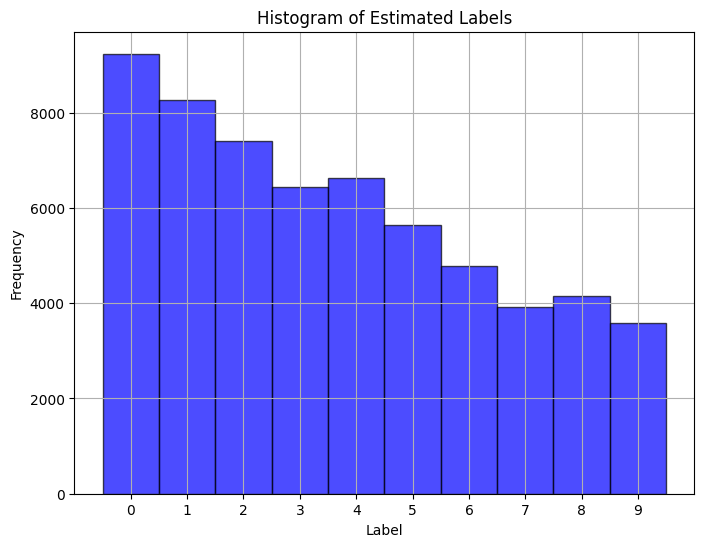

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of estimated labels
plt.figure(figsize=(8, 6))
plt.hist(estimated_labels, bins=np.arange(11) - 0.5, alpha=0.7, color='blue', edgecolor='black')
plt.xticks(range(10))
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Labels')
plt.grid(True)
plt.show()


In [ ]:
# Define a nonprivate baseline model
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the baseline model
baseline_model = BaselineModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001)

# Train the baseline model
num_epochs = 5
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = baseline_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the baseline model on the test set
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = baseline_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

baseline_accuracy = correct / total
print("Nonprivate Baseline Accuracy: {:.2f}%".format(baseline_accuracy * 100))


Nonprivate Baseline Accuracy: 96.95%


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader

# Define teacher model architecture
class TeacherModel(nn.Module):
    def __init__(self):
        super(TeacherModel, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)  # Adjust input features for SVHN
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define student model architecture
class StudentModel(nn.Module):
    def __init__(self):
        super(StudentModel, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)  # Adjust input features for SVHN
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load SVHN dataset
transform_svhn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for SVHN RGB images
])
train_dataset_svhn = datasets.SVHN('./data_svhn', split='train', download=True, transform=transform_svhn)
test_dataset_svhn = datasets.SVHN('./data_svhn', split='test', download=True, transform=transform_svhn)

# Define data loaders for teacher models
num_teachers = 10
teacher_loaders_svhn = []
for i in range(num_teachers):
    teacher_data = Subset(train_dataset_svhn, range(i * len(train_dataset_svhn) // num_teachers, (i + 1) * len(train_dataset_svhn) // num_teachers))
    teacher_loaders_svhn.append(DataLoader(teacher_data, batch_size=64, shuffle=True))

# Train teacher models
teacher_models_svhn = []
for loader in teacher_loaders_svhn:
    model = TeacherModel()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(5):  # Train for 5 epochs
        for inputs, labels in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    teacher_models_svhn.append(model)

# Aggregate teacher predictions
def aggregate_predictions(models, data_loader):
    all_preds = []
    for model in models:
        preds = []
        with torch.no_grad():
            for inputs, _ in data_loader:
                outputs = model(inputs)
                preds.extend(torch.argmax(outputs, dim=1))
        all_preds.append(preds)
    return np.array(all_preds)

train_loader_svhn = DataLoader(train_dataset_svhn, batch_size=64, shuffle=True)
teacher_preds_svhn = aggregate_predictions(teacher_models_svhn, train_loader_svhn)

# Train student model using aggregated predictions
student_model_svhn = StudentModel()
optimizer_svhn = optim.Adam(student_model_svhn.parameters(), lr=0.001)
criterion_svhn = nn.CrossEntropyLoss()

for epoch in range(5):  # Train for 5 epochs
    for inputs, labels in train_loader_svhn:
        optimizer_svhn.zero_grad()
        outputs = student_model_svhn(inputs)
        loss = criterion_svhn(outputs, labels)
        loss.backward()
        optimizer_svhn.step()

# Perform PATE analysis using Moment Account mechanism
def laplace_mechanism(data_dep_eps, delta, c, T):
    eps_per_step = data_dep_eps / (2 * T * c ** 2 + 2 * c)
    scale = 1.0 / eps_per_step
    beta = np.random.laplace(0, scale, 1)[0]
    return beta

def pate_analysis(preds, epsilon, delta, T):
    c = 10  # Number of classes
    data_dep_eps = epsilon / (2 * T * np.log(1 / delta) ** 0.5)
    noise = [laplace_mechanism(data_dep_eps, delta, c, T) for _ in range(len(preds[0]))]
    noisy_counts = preds + noise
    max_counts = np.max(noisy_counts, axis=0)
    estimated_labels = np.argmax(noisy_counts, axis=0)
    return estimated_labels, data_dep_eps

estimated_labels_svhn, data_dep_eps_svhn = pate_analysis(teacher_preds_svhn, epsilon=2.04, delta=1e-5, T=5)

# Evaluate student model on SVHN test set
test_loader_svhn = DataLoader(test_dataset_svhn, batch_size=64, shuffle=False)
correct_svhn = 0
total_svhn = 0
with torch.no_grad():
    for inputs, labels in test_loader_svhn:
        outputs = student_model_svhn(inputs)
        _, predicted_svhn = torch.max(outputs.data, 1)
        total_svhn += labels.size(0)
        correct_svhn += (predicted_svhn == labels).sum().item()

student_accuracy_svhn = correct_svhn / total_svhn

print("Estimated Labels (SVHN):", estimated_labels_svhn)
print("Data Dependent Epsilon (SVHN):", data_dep_eps_svhn)
print("Accuracy of the student model on the SVHN test images: {:.2f}%".format(student_accuracy_svhn * 100))


Using downloaded and verified file: ./data_svhn/train_32x32.mat
Using downloaded and verified file: ./data_svhn/test_32x32.mat
Estimated Labels (SVHN): [6 8 2 ... 0 5 0]
Data Dependent Epsilon (SVHN): 0.06012254013077912
Accuracy of the student model on the SVHN test images: 78.58%


mnist data set nonprivate baseline oercent


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the baseline model architecture
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Define the data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Train the nonprivate baseline model
def train_baseline(model, train_loader, optimizer, criterion, num_epochs=5):
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Evaluate the nonprivate baseline model
def evaluate_baseline(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Initialize the baseline model
baseline_model = BaselineModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001)

# Train the nonprivate baseline model
train_baseline(baseline_model, train_loader, optimizer, criterion)

# Evaluate the accuracy of the nonprivate baseline model
baseline_accuracy = evaluate_baseline(baseline_model, test_loader)
print("Nonprivate Baseline Accuracy: {:.2f}%".format(baseline_accuracy * 100))

# Introduce differential privacy to the training process
def train_with_dp(model, train_loader, epsilon, delta, optimizer, criterion, num_epochs=5):
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Add noise to the gradients to achieve differential privacy
            for param in model.parameters():
                noise = torch.tensor(np.random.laplace(0, 1/(epsilon * len(train_dataset)), size=param.grad.shape)).float()
                param.grad += noise

# Train the differentially private model
epsilon = 2.04
delta = 1e-5
train_with_dp(baseline_model, train_loader, epsilon, delta, optimizer, criterion)

# Evaluate the accuracy of the differentially private model
dp_accuracy = evaluate_baseline(baseline_model, test_loader)
print("Differentially Private Model Accuracy (ε={}, δ={}): {:.2f}%".format(epsilon, delta, dp_accuracy * 100))


Nonprivate Baseline Accuracy: 96.77%
Differentially Private Model Accuracy (ε=2.04, δ=1e-05): 97.28%


svhn dataset nonprivate baseline percentage


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the baseline model architecture
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the SVHN dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset_svhn = datasets.SVHN('./data_svhn', split='train', download=True, transform=transform)
test_dataset_svhn = datasets.SVHN('./data_svhn', split='test', download=True, transform=transform)

# Define the data loaders
train_loader_svhn = DataLoader(train_dataset_svhn, batch_size=64, shuffle=True)
test_loader_svhn = DataLoader(test_dataset_svhn, batch_size=64, shuffle=False)

# Train the nonprivate baseline model
def train_baseline(model, train_loader, optimizer, criterion, num_epochs=5):
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

# Evaluate the nonprivate baseline model
def evaluate_baseline(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

# Initialize the baseline model
baseline_model_svhn = BaselineModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(baseline_model_svhn.parameters(), lr=0.001)

# Train the nonprivate baseline model on SVHN
train_baseline(baseline_model_svhn, train_loader_svhn, optimizer, criterion)

# Evaluate the accuracy of the nonprivate baseline model on SVHN test set
baseline_accuracy_svhn = evaluate_baseline(baseline_model_svhn, test_loader_svhn)
print("Nonprivate Baseline Accuracy on SVHN: {:.2f}%".format(baseline_accuracy_svhn * 100))

# Introduce differential privacy to the training process
def train_with_dp(model, train_loader, epsilon, delta, optimizer, criterion, num_epochs=5):
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Add noise to the gradients to achieve differential privacy
            for param in model.parameters():
                noise = torch.tensor(np.random.laplace(0, 1/(epsilon * len(train_dataset_svhn)), size=param.grad.shape)).float()
                param.grad += noise

# Train the differentially private model on SVHN
epsilon = 5.04
delta = 1e-5
train_with_dp(baseline_model_svhn, train_loader_svhn, epsilon, delta, optimizer, criterion)

# Evaluate the accuracy of the differentially private model on SVHN test set
dp_accuracy_svhn = evaluate_baseline(baseline_model_svhn, test_loader_svhn)
print("Differentially Private Model Accuracy on SVHN (ε={}, δ={}): {:.2f}%".format(epsilon, delta, dp_accuracy_svhn * 100))


Using downloaded and verified file: ./data_svhn/train_32x32.mat
Using downloaded and verified file: ./data_svhn/test_32x32.mat
Nonprivate Baseline Accuracy on SVHN: 79.38%
Differentially Private Model Accuracy on SVHN (ε=5.04, δ=1e-05): 79.27%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate non-private teacher images
def generate_teacher_images(num_teachers, num_images_per_teacher, image_size=(28, 28)):
    teacher_images = []
    for _ in range(num_teachers):
        images = np.random.rand(num_images_per_teacher, *image_size)
        teacher_images.append(images)
    return teacher_images

# Aggregate teacher images with Laplace noise
def aggregate_with_noise(teacher_images, epsilon):
    num_teachers, num_images_per_teacher, height, width = teacher_images.shape
    noisy_images = []
    for i in range(num_images_per_teacher):
        aggregated_image = np.mean(teacher_images[:, i, :, :], axis=0)
        noise = np.random.laplace(0, 1/epsilon, size=(height, width))
        noisy_image = aggregated_image + noise
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

# Generate teacher images
num_teachers = 10
num_images_per_teacher = 5
teacher_images = generate_teacher_images(num_teachers, num_images_per_teacher)

# Aggregate teacher images with Laplace noise
epsilon = 1.0  # Privacy parameter
noisy_images = aggregate_with_noise(np.array(teacher_images), epsilon)

# Plot non-private and differentially private images
plt.figure(figsize=(15, 6))
for i in range(num_teachers):
    for j in range(num_images_per_teacher):
        plt.subplot(num_teachers, num_images_per_teacher * 2, i * num_images_per_teacher * 2 + j + 1)
        plt.imshow(teacher_images[i][j], cmap='gray')
        plt.title("Teacher Image")
        plt.axis('off')

        plt.subplot(num_teachers, num_images_per_teacher * 2, i * num_images_per_teacher * 2 + j + 1 + num_images_per_teacher)
        plt.imshow(noisy_images[j], cmap='gray')
        plt.title("Noisy Image")
        plt.axis('off')

plt.tight_layout()
plt.show()


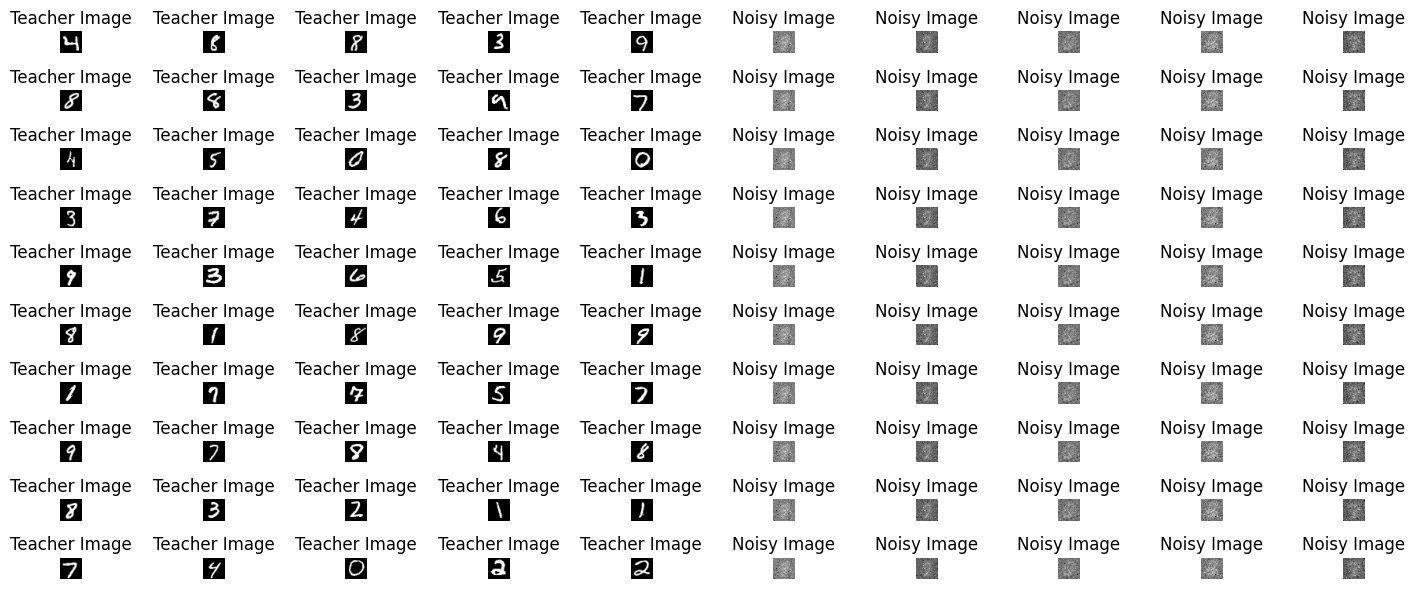

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to [-1, 1]
])

mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)

# Sample a subset of MNIST dataset for teacher images
num_teachers = 10
num_images_per_teacher = 5

teacher_images = []
indices = np.arange(len(mnist_dataset))

for _ in range(num_teachers):
    np.random.shuffle(indices)
    teacher_data = indices[:num_images_per_teacher]
    images = np.array([mnist_dataset[i][0].numpy() for i in teacher_data])
    teacher_images.append(images)

# Convert the list of arrays to a proper numpy array
teacher_images = np.array(teacher_images)

# Aggregate teacher images with Laplace noise
def aggregate_with_noise(teacher_images, epsilon):
    num_teachers, num_images_per_teacher, channels, height, width = teacher_images.shape
    noisy_images = []
    for i in range(num_images_per_teacher):
        aggregated_image = np.mean(teacher_images[:, i, :, :, :], axis=0)
        noise = np.random.laplace(0, 1 / epsilon, size=(channels, height, width))
        noisy_image = aggregated_image + noise
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

# Aggregate teacher images with Laplace noise
epsilon = 2.04  # Privacy parameter
noisy_images = aggregate_with_noise(teacher_images, epsilon)

# Plot non-private and differentially private images
plt.figure(figsize=(15, 6))
for i in range(num_teachers):
    for j in range(num_images_per_teacher):
        plt.subplot(num_teachers, num_images_per_teacher * 2, i * num_images_per_teacher * 2 + j + 1)
        plt.imshow(teacher_images[i][j].squeeze(), cmap='gray')
        plt.title("Teacher Image")
        plt.axis('off')

        plt.subplot(num_teachers, num_images_per_teacher * 2, i * num_images_per_teacher * 2 + j + 1 + num_images_per_teacher)
        plt.imshow(noisy_images[j].squeeze(), cmap='gray')
        plt.title("Noisy Image")
        plt.axis('off')

plt.tight_layout()
plt.show()


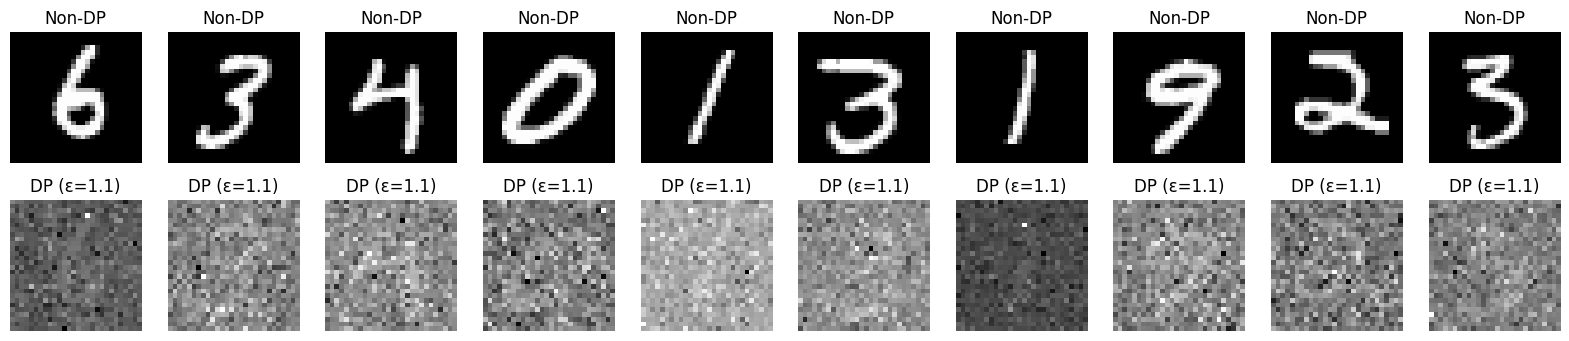

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)
train_loader = DataLoader(mnist_dataset, batch_size=10, shuffle=True)

# Get one batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)
images = images.numpy()

# Function to add differential privacy (Laplace noise)
def add_dp_noise(image, epsilon):
    noise = np.random.laplace(0, 1/epsilon, image.shape)
    noisy_image = image + noise
    return noisy_image

# Epsilon for differential privacy
epsilon = 0.7

# Generate non-private and differentially private images
non_private_images = images
differentially_private_images = np.array([add_dp_noise(img, epsilon) for img in images])

# Display the images
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axs[0, i].imshow(non_private_images[i].squeeze(), cmap='gray')
    axs[0, i].set_title("Non-DP")
    axs[0, i].axis('off')

    axs[1, i].imshow(differentially_private_images[i].squeeze(), cmap='gray')
    axs[1, i].set_title("DP (ε=1.1)")
    axs[1, i].axis('off')

plt.show()


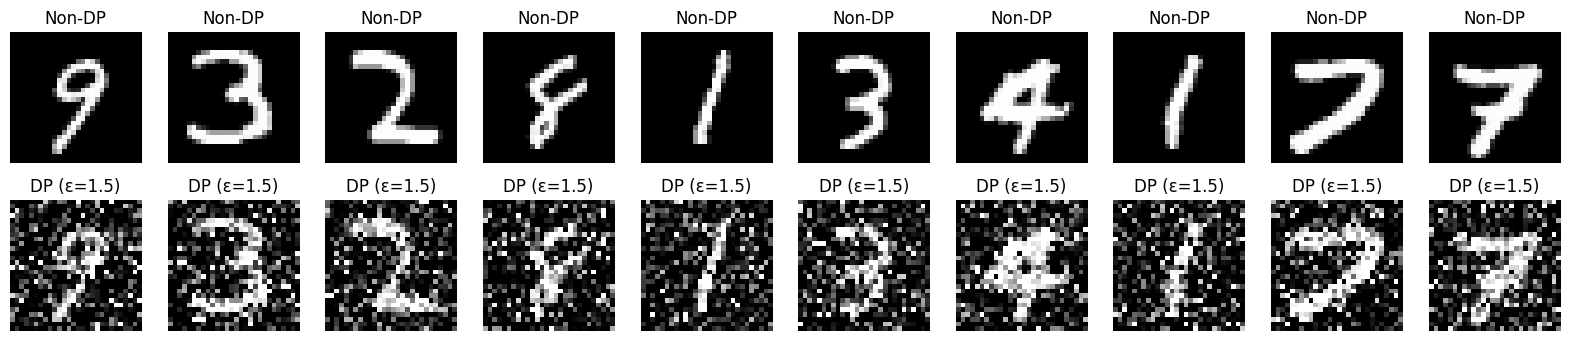

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Ensure you have the necessary libraries installed:
# pip install torch torchvision matplotlib

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values to [-1, 1]
])

mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)
train_loader = DataLoader(mnist_dataset, batch_size=10, shuffle=True)

# Get one batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)
images = images.numpy()  # Convert to numpy array for processing

# Function to add differential privacy (Laplace noise)
def add_dp_noise(image, epsilon):
    noise = np.random.laplace(0, 1/epsilon, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, -1, 1)  # Clip values to ensure they are within the visualizable range.

# Epsilon for differential privacy
epsilon = 1.5

# Generate non-private and differentially private images
non_private_images = images
differentially_private_images = np.array([add_dp_noise(img, epsilon) for img in images])

# Display the images
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axs[0, i].imshow(non_private_images[i].squeeze(), cmap='gray')
    axs[0, i].set_title("Non-DP")
    axs[0, i].axis('off')

    axs[1, i].imshow(differentially_private_images[i].squeeze(), cmap='gray')
    axs[1, i].set_title(f"DP (ε={epsilon})")
    axs[1, i].axis('off')

plt.show()


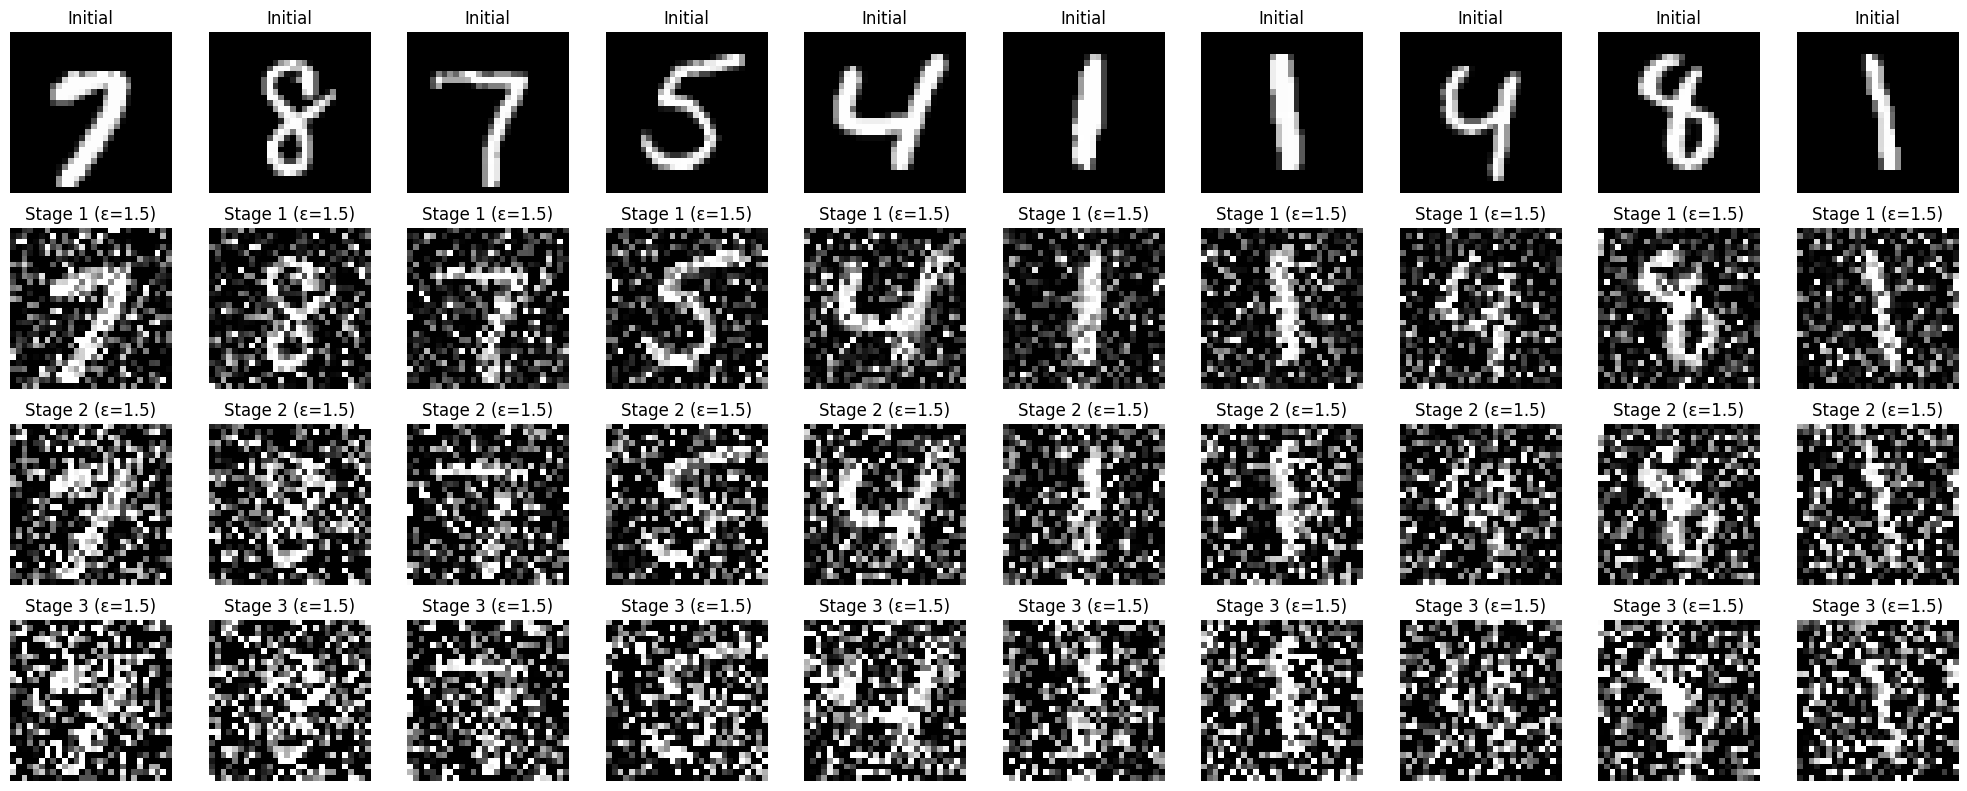

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Ensure you have the necessary libraries installed:
# pip install torch torchvision matplotlib

# Load MNIST dataset with transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values to [-1, 1]
])

mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)
train_loader = DataLoader(mnist_dataset, batch_size=10, shuffle=True)

# Get one batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)
images = images.numpy()  # Convert to numpy array for processing

# Function to add differential privacy (Laplace noise) in stages
def add_dp_noise_staged(image, epsilon, stages=3):
    noisy_image = image.copy()
    for _ in range(stages):
        noise = np.random.laplace(0, 1/epsilon, image.shape)
        noisy_image += noise
        yield np.clip(noisy_image, -1, 1)  # Yielding the noisy image at each stage

# Epsilon for differential privacy
epsilon = 1.5

# Display the images
fig, axs = plt.subplots(4, 10, figsize=(20, 8))  # Adjust subplot grid for stages
stage_titles = ['Initial', 'Stage 1', 'Stage 2', 'Stage 3']
for i in range(10):
    # Show non-private image
    axs[0, i].imshow(images[i].squeeze(), cmap='gray')
    axs[0, i].set_title(stage_titles[0])
    axs[0, i].axis('off')

    # Generate differentially private images in stages
    stage_generator = add_dp_noise_staged(images[i], epsilon)
    for stage in range(1, 4):
        stage_image = next(stage_generator)
        axs[stage, i].imshow(stage_image.squeeze(), cmap='gray')
        axs[stage, i].set_title(f"{stage_titles[stage]} (ε={epsilon})")
        axs[stage, i].axis('off')

plt.tight_layout()
plt.show()


Average MSE across all stages: 0.5814
Average SSIM across all stages: 0.2452
Average PSNR across all stages: 8.6015


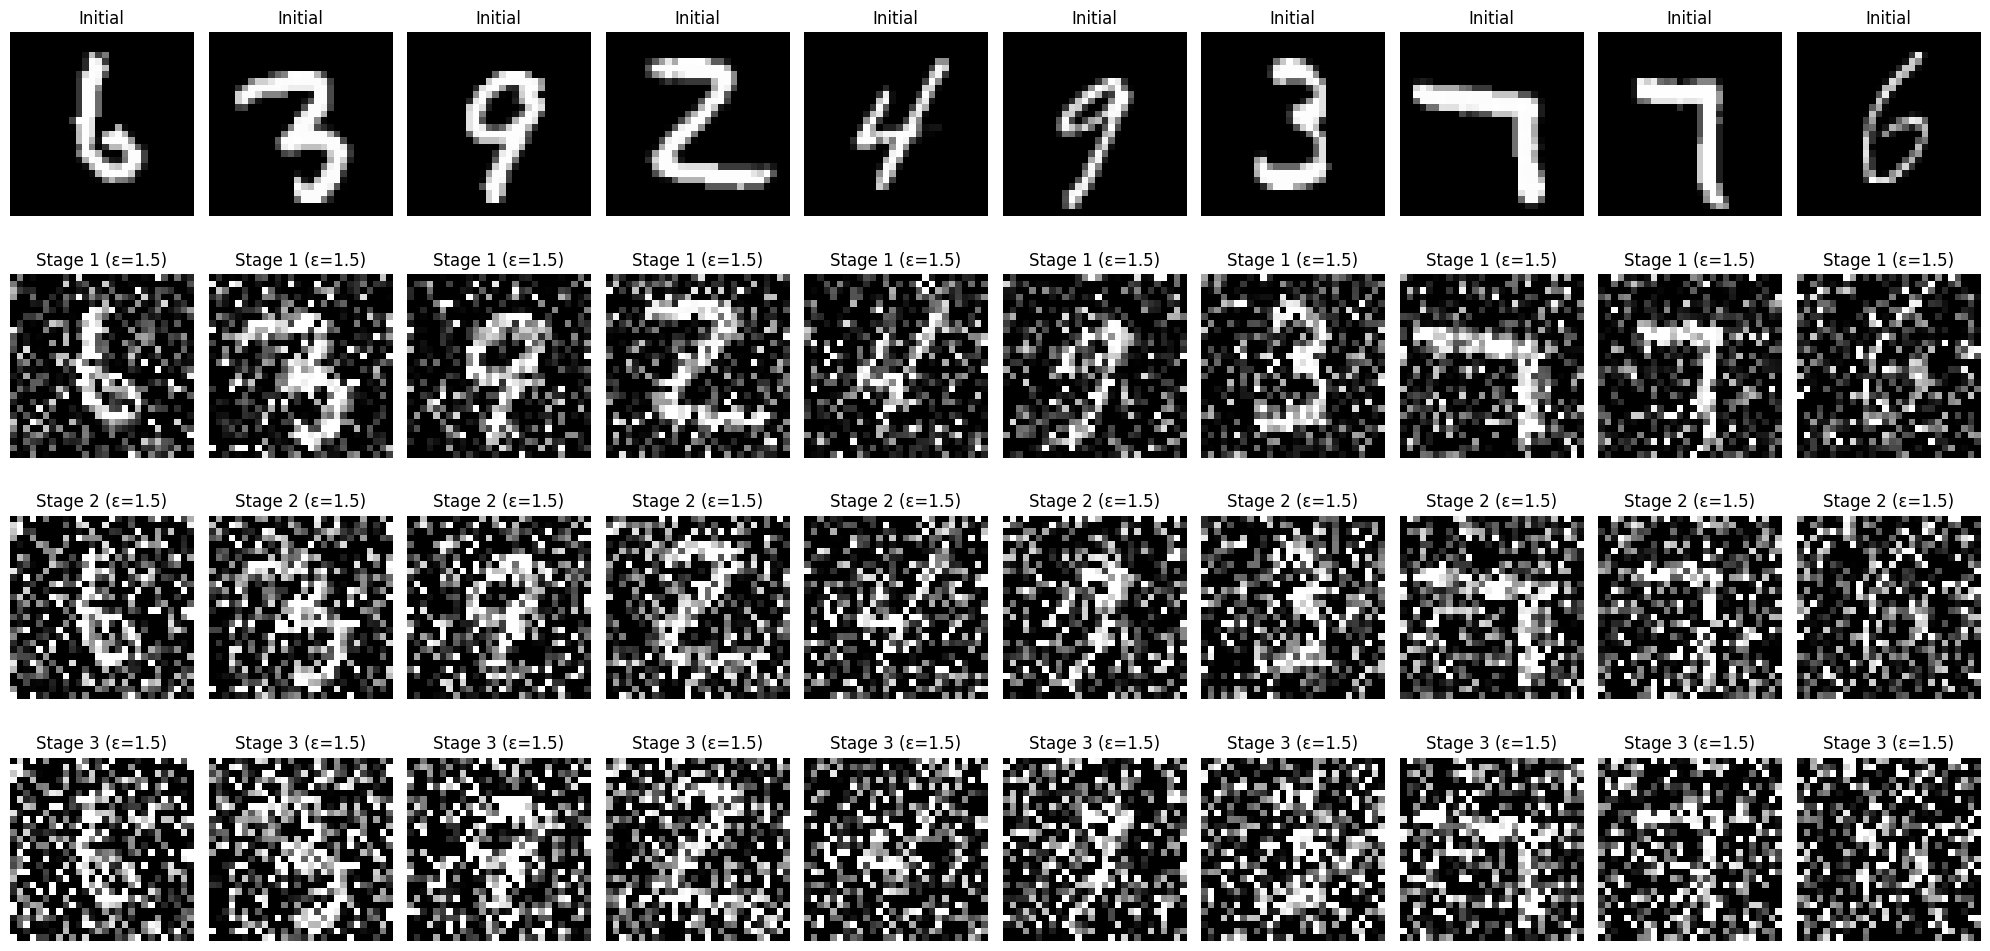

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

# Ensure you have the necessary libraries installed:
# pip install torch torchvision matplotlib scikit-image

# Load MNIST dataset with transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalizes pixel values to [-1, 1]
])

mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)
train_loader = DataLoader(mnist_dataset, batch_size=10, shuffle=True)

# Get one batch of data
data_iter = iter(train_loader)
images, labels = next(data_iter)
images = images.numpy()

# Function to add differential privacy (Laplace noise) in stages
def add_dp_noise_staged(image, epsilon, stages=3):
    noisy_image = image.copy()
    for _ in range(stages):
        noise = np.random.laplace(0, 1/epsilon, image.shape)
        noisy_image += noise
        yield np.clip(noisy_image, -1, 1)  # Yielding the noisy image at each stage

# Epsilon for differential privacy
epsilon = 1.5

# Evaluation Metrics
metrics = {'MSE': [], 'SSIM': [], 'PSNR': []}

# Display the images and calculate metrics
fig, axs = plt.subplots(4, 10, figsize=(20, 10))  # Adjust subplot grid for stages
stage_titles = ['Initial', 'Stage 1', 'Stage 2', 'Stage 3']
for i in range(10):
    # Show non-private image
    original_image = images[i].squeeze()
    axs[0, i].imshow(original_image, cmap='gray')
    axs[0, i].set_title(stage_titles[0])
    axs[0, i].axis('off')

    # Generate differentially private images in stages
    stage_generator = add_dp_noise_staged(images[i], epsilon)
    for stage in range(1, 4):
        stage_image = next(stage_generator).squeeze()
        axs[stage, i].imshow(stage_image, cmap='gray')
        axs[stage, i].set_title(f"{stage_titles[stage]} (ε={epsilon})")
        axs[stage, i].axis('off')

        # Calculate metrics
        metrics['MSE'].append(mse(original_image, stage_image))
        metrics['SSIM'].append(ssim(original_image, stage_image, data_range=stage_image.max() - stage_image.min()))
        metrics['PSNR'].append(psnr(original_image, stage_image, data_range=2))  # data_range is 2 because pixel values are between -1 and 1

# Print average metrics for each stage
for key in metrics:
    average_metric = np.mean(metrics[key])
    print(f"Average {key} across all stages: {average_metric:.4f}")

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# Define model architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        return F.log_softmax(self.fc2(x), dim=1)

# Load dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)

# Divide dataset for teachers
num_teachers = 10
teacher_dataset_size = len(mnist_dataset) // num_teachers
teacher_datasets = [Subset(mnist_dataset, list(range(i * teacher_dataset_size, (i + 1) * teacher_dataset_size))) for i in range(num_teachers)]

# Train teacher models
teacher_models = [SimpleNN() for _ in range(num_teachers)]
for i, model in enumerate(teacher_models):
    loader = DataLoader(teacher_datasets[i], batch_size=64, shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for epoch in range(5):
        for data, target in loader:
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

# Aggregate teacher predictions with differential privacy
def aggregate_teachers(data_loader, models, epsilon):
    num_data = len(data_loader.dataset)
    preds = torch.zeros((num_data, 10))
    for model in models:
        model.eval()
        with torch.no_grad():
            for i, (data, _) in enumerate(data_loader):
                output = model(data)
                batch_start = i * data_loader.batch_size
                batch_end = batch_start + data.size(0)
                preds[batch_start:batch_end] += output

    # Add Laplacian noise for differential privacy
    noise = np.random.laplace(0, 1/epsilon, preds.shape)
    preds += torch.tensor(noise).float()
    return torch.argmax(preds, dim=1)

# Prepare data loader for testing (could be a smaller set for performance)
test_loader = DataLoader(mnist_dataset, batch_size=1000, shuffle=False)
epsilon = 0.5  # Differential privacy parameter
aggregated_labels = aggregate_teachers(test_loader, teacher_models, epsilon)

# Display results
print("Aggregated Labels with Noise (Sample):", aggregated_labels[:10].numpy())


Aggregated Labels with Noise (Sample): [5 0 4 1 9 2 1 3 1 4]


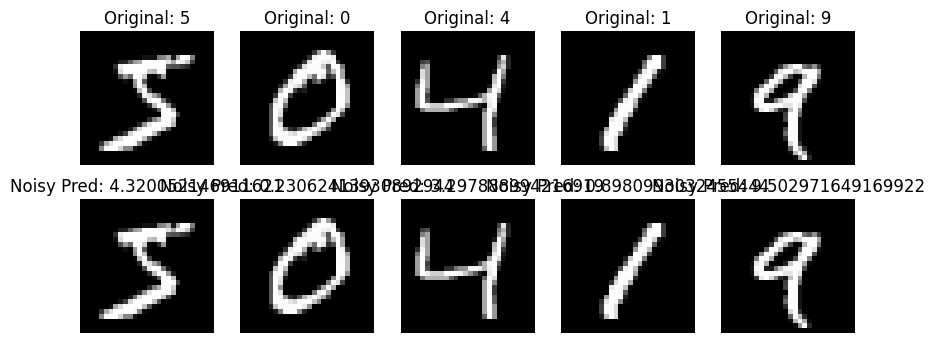

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

# Define model architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        return F.log_softmax(self.fc2(x), dim=1)

# Load dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)

# Sample images to show
sample_images = []
sample_labels = []
for i in range(5):
    img, label = mnist_dataset[i]
    sample_images.append(img)
    sample_labels.append(label)

# Train a single model for simplicity
model = SimpleNN()
loader = DataLoader(mnist_dataset, batch_size=64, shuffle=True)
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()
for epoch in range(1):  # Reduce training to a single epoch for brevity
    for data, target in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

# Demonstrate on a subset of data
test_loader = DataLoader(mnist_dataset, batch_size=100, shuffle=False)
model.eval()

# Collect predictions
original_preds = []
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        original_preds.extend(pred)

# Add noise for differential privacy
epsilon = 2.5  # Differential privacy parameter
noisy_preds = [pred + torch.tensor(np.random.laplace(0, 1/epsilon)) for pred in original_preds[:5]]

# Plot original and noisy images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, (img, label, noisy_pred) in enumerate(zip(sample_images, sample_labels, noisy_preds)):
    axes[0, i].imshow(img.squeeze(), cmap='gray')
    axes[0, i].set_title(f'Original: {label}')
    axes[0, i].axis('off')

    # Since we are directly adding noise to predictions, we visualize this as text
    axes[1, i].imshow(img.squeeze(), cmap='gray')
    axes[1, i].set_title(f'Noisy Pred: {noisy_pred.item()}')
    axes[1, i].axis('off')

plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, random_split
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        return self.fc2(F.relu(self.fc1(x)))

# Load dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist_dataset = datasets.MNIST('./data_mnist', train=True, download=True, transform=transform)

# Split the dataset into parts for each teacher
num_teachers = 10
teacher_size = len(mnist_dataset) // num_teachers
teacher_datasets = [Subset(mnist_dataset, list(range(i * teacher_size, (i + 1) * teacher_size))) for i in range(num_teachers)]

# Train teacher models
teachers = [Net() for _ in range(num_teachers)]
epochs = 5
teacher_models = []
for i in range(num_teachers):
    model = teachers[i]
    optimizer = optim.Adam(model.parameters())
    teacher_loader = DataLoader(teacher_datasets[i], batch_size=64, shuffle=True)
    for epoch in range(epochs):
        model.train()
        for data, target in teacher_loader:
            data = data.view(-1, 28*28)
            optimizer.zero_grad()
            output = model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
    teacher_models.append(model)

# Aggregate and add noise to the teacher votes
def aggregate_with_noise(data_loader, models, epsilon):
    preds_list = []
    for data, _ in data_loader:
        data = data.view(-1, 28*28)
        outputs = torch.stack([model(data) for model in models])
        preds = outputs.argmax(dim=2)
        preds_list.append(preds)
    all_votes = torch.cat(preds_list, dim=1)

    # Apply Laplacian noise
    laplace_scale = 1.0 / epsilon
    noise = torch.from_numpy(np.random.laplace(0, laplace_scale, all_votes.size())).float()
    noisy_votes = all_votes.float() + noise

    # Secure the noisy votes within the valid range [0, 9]
    final_votes = noisy_votes % 10
    final_labels = torch.mode(final_votes, dim=0).values.long()
    return final_labels

test_loader = DataLoader(mnist_dataset, batch_size=1000, shuffle=False)
epsilon = 0.1
noisy_labels = aggregate_with_noise(test_loader, teacher_models, epsilon)

# Training a student model
student_model = Net()
student_optimizer = optim.Adam(student_model.parameters())
student_epochs = 5

for epoch in range(student_epochs):
    student_model.train()
    for data, target in DataLoader(list(zip(mnist_dataset.data, noisy_labels)), batch_size=64, shuffle=True):
        data = data.float().view(-1, 28 * 28) / 255.0
        student_optimizer.zero_grad()
        output = student_model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        student_optimizer.step()

# Evaluate the student model
student_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in DataLoader(mnist_dataset, batch_size=1000):
        data = data.float().view(-1, 28 * 28) / 255.0
        output = student_model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.size(0)

print(f'Accuracy of the student model: {correct / total * 100:.2f}%')


Accuracy of the student model: 9.87%


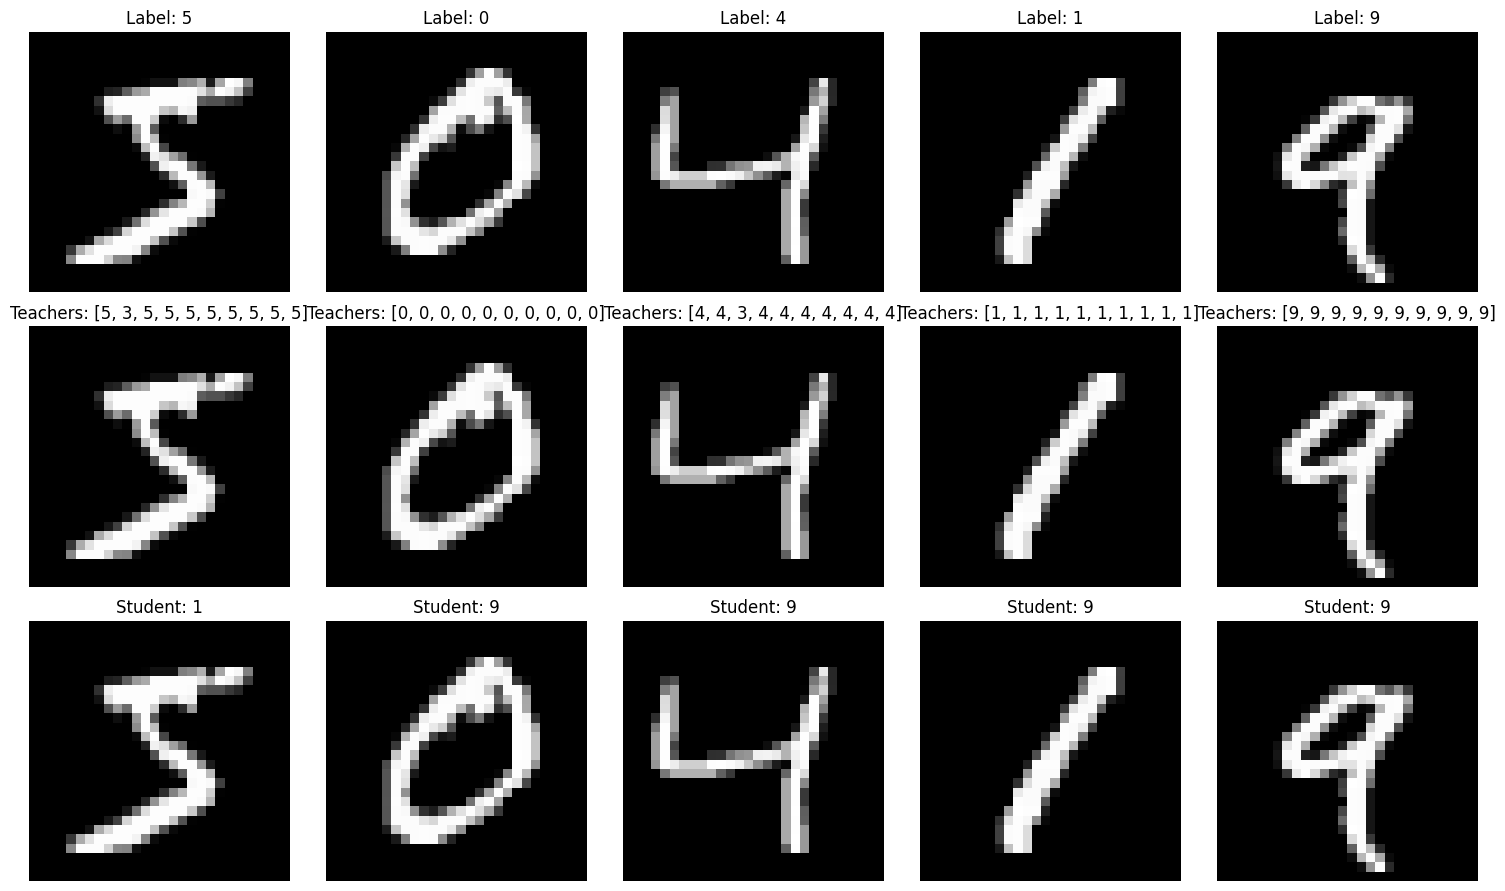

In [ ]:
import matplotlib.pyplot as plt

# Assume 'sample_images' and 'sample_targets' are your MNIST images and labels for visualization
# Assume 'teacher_models' are trained and 'student_model' is trained

# Function to predict labels using a model
def predict_with_model(model, images):
    model.eval()
    with torch.no_grad():
        images = images.view(-1, 28*28)  # Flatten images
        output = model(images)
        _, predicted = torch.max(output, 1)
    return predicted

# Get predictions for sample images from each teacher
teacher_predictions = [predict_with_model(teacher, sample_images) for teacher in teacher_models]

# Get predictions from the student model
student_predictions = predict_with_model(student_model, sample_images)

# Visualizing predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))  # Adjust size as needed
for i in range(5):
    # Show the image
    axes[0, i].imshow(sample_images[i].squeeze(), cmap='gray')
    axes[0, i].set_title(f"Label: {sample_targets[i]}")
    axes[0, i].axis('off')

    # Show teacher predictions
    teacher_preds = [pred[i].item() for pred in teacher_predictions]
    axes[1, i].imshow(sample_images[i].squeeze(), cmap='gray')
    axes[1, i].set_title(f"Teachers: {teacher_preds}")
    axes[1, i].axis('off')

    # Show student prediction
    axes[2, i].imshow(sample_images[i].squeeze(), cmap='gray')
    axes[2, i].set_title(f"Student: {student_predictions[i].item()}")
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

def evaluate_metrics(original_images, noisy_images_list):
    """
    Evaluate MSE, SSIM, and PSNR for lists of noisy images compared to the original images,
    and plot these metrics.

    :param original_images: Array of original images.
    :param noisy_images_list: List of arrays of noisy images at different stages.
    :return: Dictionary containing lists of metrics (MSE, SSIM, PSNR) for each stage.
    """
    metrics = {
        'MSE': [],
        'SSIM': [],
        'PSNR': []
    }

    stages = len(noisy_images_list)
    stages_idx = range(1, stages + 1)

    # Calculate metrics
    for stage_images in noisy_images_list:
        stage_mse = []
        stage_ssim = []
        stage_psnr = []

        for orig_img, noisy_img in zip(original_images, stage_images):
            stage_mse.append(mse(orig_img, noisy_img))
            stage_ssim.append(ssim(orig_img, noisy_img, data_range=noisy_img.max() - noisy_img.min()))
            stage_psnr.append(psnr(orig_img, noisy_img, data_range=2))  # Assuming pixel values between -1 and 1

        metrics['MSE'].append(np.mean(stage_mse))
        metrics['SSIM'].append(np.mean(stage_ssim))
        metrics['PSNR'].append(np.mean(stage_psnr))

    # Plot metrics
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(stages_idx, metrics['MSE'], marker='o', linestyle='-')
    ax[0].set_title('Mean Squared Error (MSE)')
    ax[0].set_xlabel('Noise Stages')
    ax[0].set_ylabel('MSE')

    ax[1].plot(stages_idx, metrics['SSIM'], marker='o', linestyle='-', color='green')
    ax[1].set_title('Structural Similarity Index (SSIM)')
    ax[1].set_xlabel('Noise Stages')
    ax[1].set_ylabel('SSIM')

    ax[2].plot(stages_idx, metrics['PSNR'], marker='o', linestyle='-', color='red')
    ax[2].set_title('Peak Signal-to-Noise Ratio (PSNR)')
    ax[2].set_xlabel('Noise Stages')
    ax[2].set_ylabel('PSNR')

    plt.tight_layout()
    plt.show()

    return metrics

# Example usage
# Assuming you have numpy arrays: original_images, stage_1_images, stage_2_images, stage_3_images
# original_images = np.array([...])  # Original images
# stage_1_images = np.array([...])   # Images after first stage of noise
# stage_2_images = np.array([...])   # Second stage
# stage_3_images = np.array([...])   # Third stage

# noisy_images_list = [stage_1_images, stage_2_images, stage_3_images]
# results = evaluate_metrics(original_images, noisy_images_list)
